In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("Data/train_processed_tf_idf_bow.csv")
test = pd.read_csv("Data/test_processed_tf_idf_bow.csv")
sub_sample = pd.read_csv("Data/sample_submission.csv")

print (train.shape, test.shape, sub_sample.shape)



(7613, 1844) (3263, 1843) (3263, 2)


## Random Forest

Como parte del preprocesamiento se escalan los datos aplicando normalizacion y como modelo Random Forest

In [3]:
features_to_drop = ['id', 'keyword','location','text','location_clean','text_clean', 'hashtags', 'mentions','links']
scaler = MinMaxScaler()


X_train = train.drop(columns = features_to_drop + ['target'])
X_test = test.drop(columns = features_to_drop)
y_train = train.target

rf = RandomForestClassifier(random_state = 1)

pipeline = Pipeline([('scale',scaler), ('rf', rf),])

pipeline.fit(X_train, y_train)
y_test = pipeline.predict(X_test)

submit = sub_sample.copy()
submit.target = y_test
submit.to_csv('submit_rf.csv',index=False)

In [4]:
rf.feature_importances_
np.amax(rf.feature_importances_)

0.1411990686115722

In [5]:
X_train.columns

Index(['Unnamed: 0', 'text_len', 'word_count', 'stop_word_count',
       'punctuation_count', 'hashtag_count', 'mention_count', 'link_count',
       'caps_count', 'caps_ratio',
       ...
       'û_', 'ûª', 'ûªs', 'ûªt', 'ûªve', 'ûï', 'ûïwhen', 'ûïwhen saw', 'ûò',
       'ûó'],
      dtype='object', length=1834)

In [6]:
data = [X_train.columns, rf.feature_importances_]
print(data)

[Index(['Unnamed: 0', 'text_len', 'word_count', 'stop_word_count',
       'punctuation_count', 'hashtag_count', 'mention_count', 'link_count',
       'caps_count', 'caps_ratio',
       ...
       'û_', 'ûª', 'ûªs', 'ûªt', 'ûªve', 'ûï', 'ûïwhen', 'ûïwhen saw', 'ûò',
       'ûó'],
      dtype='object', length=1834), array([4.48760356e-02, 2.90723832e-02, 1.93822270e-02, ...,
       5.85809834e-05, 7.41413261e-04, 4.25884480e-04])]


In [7]:
print ('Training accuracy: %.4f' % pipeline.score(X_train, y_train))

Training accuracy: 1.0000


In [8]:
# F-1 score
from sklearn.metrics import f1_score
print ('Training set f-1 score: %.4f' % f1_score(y_train, pipeline.predict(X_train)))

Training set f-1 score: 1.0000


In [9]:
# Matriz de Confucion
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train, pipeline.predict(X_train)))

,0,1
0,4342,0
1,0,3271


## Evaluacion del Modelo

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
cv_score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
print('Cross validation F-1 score: %.3f' %np.mean(cv_score))

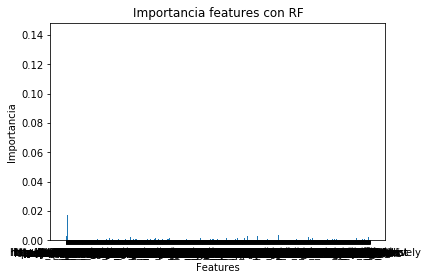

In [10]:
# Gini importance
plt.bar(X_train.columns, rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia features con RF')
plt.show()

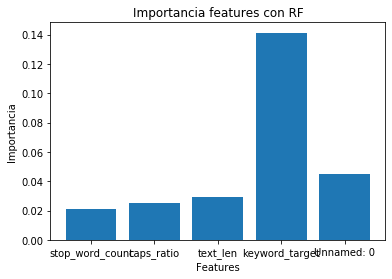

In [11]:
top = 5
# Obtengo los "top" índices de las features más importantes
indices = np.argpartition(rf.feature_importances_, -top)[-top:]
importances = rf.feature_importances_
columns = X_train.columns
top_importances = [importances[index] for index in indices]
top_columns = [columns[index] for index in indices]

plt.bar(top_columns, top_importances)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia features con RF')
plt.show()# F-1 score


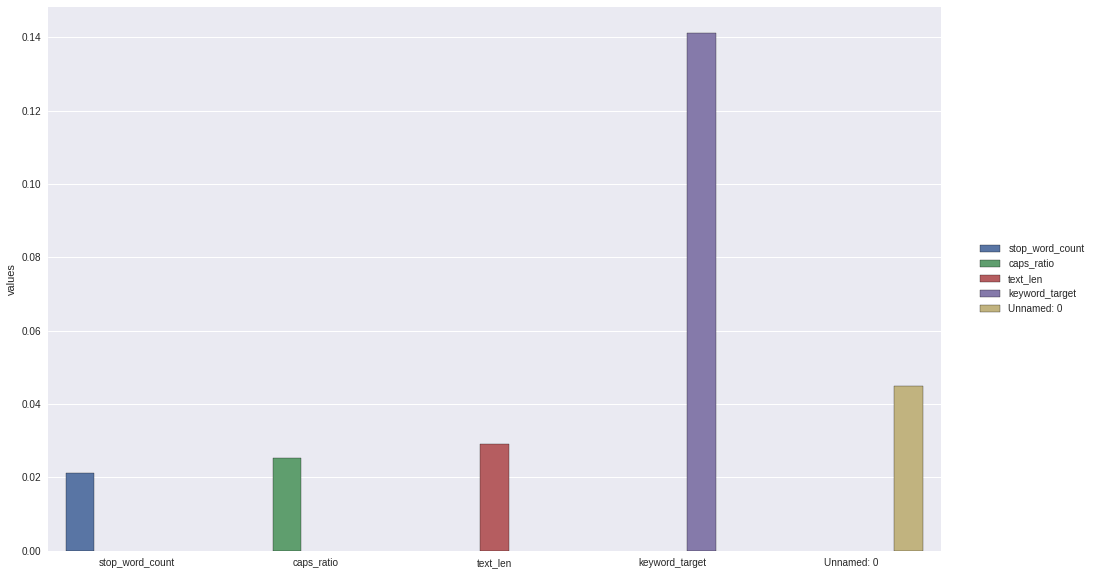

In [12]:

# plt styling parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams["patch.force_edgecolor"] = True

df = pd.DataFrame({
    'names': top_columns,
    'values': top_importances
})

# create a color palette the length of the dataframe
colors = sns.color_palette('husl', n_colors=len(df))
# plot
p = sns.barplot(x=top_columns, y='values', data=df, hue='names')

# place the legend to the right of the plot
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)# Matriz de Confucion


In [13]:

# plt styling parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams["patch.force_edgecolor"] = True

df = pd.DataFrame({
    'names': columns,
    'values': importances
})

# create a color palette the length of the dataframe
colors = sns.color_palette('husl', n_colors=len(df))
# plot
p = sns.barplot(x=columns, y='values', data=df, hue='names')

# place the legend to the right of the plot
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)

KeyboardInterrupt: 